In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime as dt
import datetime

### Data consolidation

In [2]:
df1 = pd.read_excel("Assesment_data_1.xlsx")

In [3]:
df2 = pd.read_excel("Assesment_data_2.xlsx")

In [4]:
df1.head()

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue
0,2,Producer2,"1-Met Client,Data Gather,Insurer Market",Transmanor Limited,Commercial Insurance - June 2019,Transportation,01/06/2019,15000.0
1,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,NaN
2,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,58524.0
3,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,NaN
4,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,15000.0


In [5]:
df2.head()

,Account Name,Acct ID,Primary Office
0,West Point Construction Ltd,A101,Office 1
1,Newmor Group Limited,A102,Office 2
2,Prohire Plc,A103,Office 2
3,G T Access Ltd,A104,Office 2
4,Arh Group Ltd,A105,Office 2


In [6]:
df3 = pd.merge(df1, df2, on='Account Name', how='inner')
df3.head()

,Date,Primary Producer,Stage Name,Account Name,Opportunity Name,Niche Affiliations,Expected Decision Date,Annual Revenue,Acct ID,Primary Office
0,2,Producer2,"1-Met Client,Data Gather,Insurer Market",Transmanor Limited,Commercial Insurance - June 2019,Transportation,01/06/2019,15000.0,A112,Office 2
1,07/03/2017,Producer2,"1-Met Client,Data Gather,Insurer Market",Transmanor Limited,Commercial Insurance - June 2019,Transportation,01/06/2019,15000.0,A112,Office 2
2,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,NaN,A160,Office 2
3,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,58524.0,A160,Office 2
4,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,NaN,A160,Office 2


In [7]:
df3.shape

(180, 10)

Create this office column for the primary producer column in df3 as mentioned in the question.

In [8]:
df3.rename(columns = {'Primary Producer':'Primary_Producer'}, inplace = True)
df3.rename(columns = {'Expected Decision Date':'Expected_Decision_Date'}, inplace = True)
df3.rename(columns = {'Stage Name':'Stage_name'}, inplace = True)
df3.rename(columns = {'Account Name':'Account_Name'}, inplace = True)
df3.rename(columns = {'Opportunity Name':'Opportunity_Name'}, inplace = True)
df3.rename(columns = {'Niche Affiliations':'Niche_Affiliations'}, inplace = True)
df3.rename(columns = {'Acct ID':'Account_Id'}, inplace = True)
df3.rename(columns = {'Primary Office':'Primary_Office'}, inplace = True)
df3.rename(columns = {'Annual Revenue':'Annual_Revenue'}, inplace = True)

In [9]:
office_list = []
for i in df3.Primary_Producer:
    if i == "Producer1":
        office_list.append('Office 1')
    elif i == "Producer2":
        office_list.append('Office 2')
    elif i == "Producer3":
        office_list.append('Office 3')
    elif i == "Producer4":
        office_list.append('Office 1')
    elif i == "Producer5":
        office_list.append('Office 2')

df3["Office_derived"]=office_list

In [10]:
df3[df3['Account_Name']=="police mutual"]

,Date,Primary_Producer,Stage_name,Account_Name,Opportunity_Name,Niche_Affiliations,Expected_Decision_Date,Annual_Revenue,Account_Id,Primary_Office,Office_derived
2,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,NaN,A160,Office 2,Office 2
3,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,58524.0,A160,Office 2,Office 2
4,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,NaN,A160,Office 2,Office 2
5,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,15000.0,A160,Office 2,Office 2
6,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,NaN,A160,Office 2,Office 2
7,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,=,NaN,A160,Office 2,Office 2
8,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,NaN,A160,Office 2,Office 2
9,01/02/2019,Producer5,3-Closed Won,police mutual,commercial covers,Commercial - All Other,28/02/2019,15000.0,A160,Office 2,Office 2


##### 2. Using Statistical techniques, bring out the insights from the data like hidden pattern, trends, associates & relation between the features.

### Statistical analysis process -

#### A- Data cleaning

#### Data quality check- 

In [11]:
def check_data_quality(df):
    """
    Check the quality of a pandas DataFrame.
    """
    # Check for missing values
    missing_values = df.isnull().sum().sum()
    if missing_values > 0:
        print(f"WARNING: DataFrame contains {missing_values} missing values.")
    
    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    if duplicate_rows > 0:
        print(f"WARNING: DataFrame contains {duplicate_rows} duplicate rows.")
    
    # Check for inconsistent data types
    inconsistent_types = df.applymap(type).nunique().sum()
    if inconsistent_types > 1:
        print("WARNING: DataFrame contains inconsistent data types.")
    
    # Check for irrelevant columns
    irrelevant_columns = df.apply(lambda col: col.nunique() == 1).sum()
    if irrelevant_columns > 0:
        print(f"WARNING: DataFrame contains {irrelevant_columns} irrelevant columns.")

In [12]:
check_data_quality(df3)

##### 1. Checking duplicate values in the data. 

In [13]:
# df3.duplicated().any()

In [14]:
# if (duplicated := df3.duplicated()).any():
#     some_duplicates = df3[duplicated].sort_values(by=df3.columns.to_list())
#     print(f"Dataframe has one or more duplicated rows:\n{some_duplicates}")

In [15]:
df4=df3.drop_duplicates()
df4.shape

(94, 11)

##### 2- Checking null values in the data.

In [16]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

In [17]:
find_missing_percent(df4)

C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\1695982164.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\1695982164.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\1695982164.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\

,ColumnName,TotalMissingVals,PercentMissing
0,Date,0.0,0.00
1,Primary_Producer,0.0,0.00
2,Stage_name,0.0,0.00
3,Account_Name,0.0,0.00
4,Opportunity_Name,0.0,0.00
5,Niche_Affiliations,10.0,10.64
6,Expected_Decision_Date,0.0,0.00
7,Annual_Revenue,2.0,2.13
8,Account_Id,0.0,0.00
9,Primary_Office,0.0,0.00


In [18]:
df4.fillna(df4.mode().iloc[0], inplace=True) # Remove null values from a dataframe.

C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\1944456113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.fillna(df4.mode().iloc[0], inplace=True) # Remove null values from a dataframe.


In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 178
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    94 non-null     object 
 1   Primary_Producer        94 non-null     object 
 2   Stage_name              94 non-null     object 
 3   Account_Name            94 non-null     object 
 4   Opportunity_Name        94 non-null     object 
 5   Niche_Affiliations      94 non-null     object 
 6   Expected_Decision_Date  94 non-null     object 
 7   Annual_Revenue          94 non-null     float64
 8   Account_Id              94 non-null     object 
 9   Primary_Office          94 non-null     object 
 10  Office_derived          94 non-null     object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [20]:
for i in df4.columns:
    if df4[i].dtypes == 'object':
        unique_cat = len(df4[i].unique())
        print("Feature '{i}' has {unique_cat} unique categories".format(i=i, unique_cat=unique_cat))

Feature 'Date' has 46 unique categories
Feature 'Primary_Producer' has 5 unique categories
Feature 'Stage_name' has 3 unique categories
Feature 'Account_Name' has 77 unique categories
Feature 'Opportunity_Name' has 65 unique categories
Feature 'Niche_Affiliations' has 18 unique categories
Feature 'Expected_Decision_Date' has 56 unique categories
Feature 'Account_Id' has 77 unique categories
Feature 'Primary_Office' has 3 unique categories
Feature 'Office_derived' has 3 unique categories


In [21]:
df5 = df4[(df4.Date != 'kj') & (df4.Date != 2) & (df4.Expected_Decision_Date != '=')] 

In [22]:
#df5['Date'] = pd.to_datetime(df5.Date, errors = 'ignore')

df5['Date']  = pd.to_datetime(df5['Date']  ,errors = 'coerce',format = '%d/%m/%Y')
df5['Expected_Decision_Date']  = pd.to_datetime(df5['Expected_Decision_Date']  ,errors = 'coerce',format = '%d/%m/%Y')

C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\2621217262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Date']  = pd.to_datetime(df5['Date']  ,errors = 'coerce',format = '%d/%m/%Y')
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\2621217262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Expected_Decision_Date']  = pd.to_datetime(df5['Expected_Decision_Date']  ,errors = 'coerce',format = '%d/%m/%Y')


## DATE

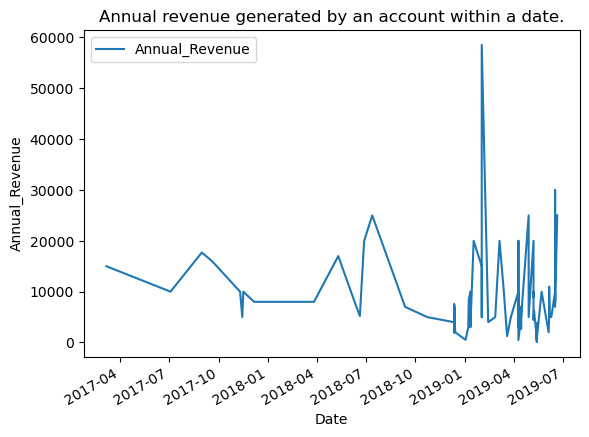

In [23]:
df5.plot(x='Date', y='Annual_Revenue', kind='line')
plt.xlabel('Date')
plt.ylabel('Annual_Revenue')
plt.title('Annual revenue generated by an account within a date.')
plt.show()

We can see that most of the accounts started there journey from 2017 onwards.

## EXPECTED DECISION DATE

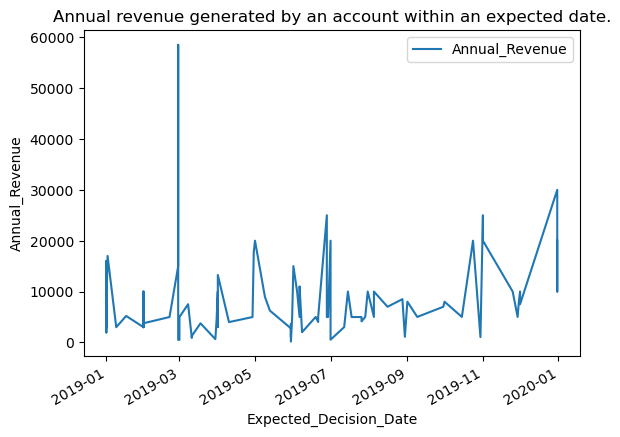

In [24]:
df5.plot(x='Expected_Decision_Date', y='Annual_Revenue', kind='line')
plt.xlabel('Expected_Decision_Date')
plt.ylabel('Annual_Revenue')
plt.title('Annual revenue generated by an account within an expected date.')
plt.show()

Almost all of the accounts are ending there journey between the years 2019 & 2020.

In [25]:
# calculate the difference between the two dates
df5['Total_journey_days'] = df5['Expected_Decision_Date'] - df5['Date']
df5['Total_journey_days'] = df5['Total_journey_days'].dt.days

C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\36195678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Total_journey_days'] = df5['Expected_Decision_Date'] - df5['Date']
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\36195678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Total_journey_days'] = df5['Total_journey_days'].dt.days


C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\2825788435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Total_journey_days'] = pd.to_numeric(df5.Total_journey_days) # This is just done to make sure that every value in age is numeric.


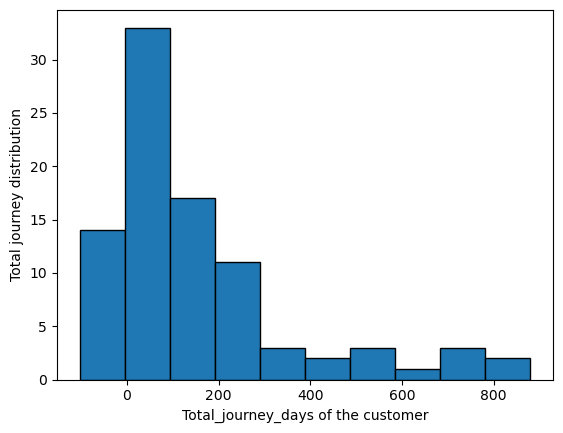

In [26]:
df5['Total_journey_days'] = pd.to_numeric(df5.Total_journey_days) # This is just done to make sure that every value in age is numeric.
plt.hist(x=df5.Total_journey_days.values, edgecolor='black')
plt.xlabel("Total_journey_days of the customer")
plt.ylabel("Total journey distribution")
plt.show()

In [27]:
df5['Total_journey_days'].min()

-103.0

In [28]:
bins= [-103,0,180,360,540,720,900] 
labels = ['<0','0-180','180-360','360-540','540-720','720-900']
df5['Total_journey_days'] = pd.cut(df5['Total_journey_days'], bins=bins, labels=labels)
df5['Total_journey_days'] = pd.Categorical(df5.Total_journey_days)

C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\3650147215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Total_journey_days'] = pd.cut(df5['Total_journey_days'], bins=bins, labels=labels)
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\3650147215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Total_journey_days'] = pd.Categorical(df5.Total_journey_days)


## ANNUAL REVENUE

C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\3623550457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Annual_Revenue'] = pd.to_numeric(df5.Annual_Revenue) # This is just done to make sure that every value in age is numeric.


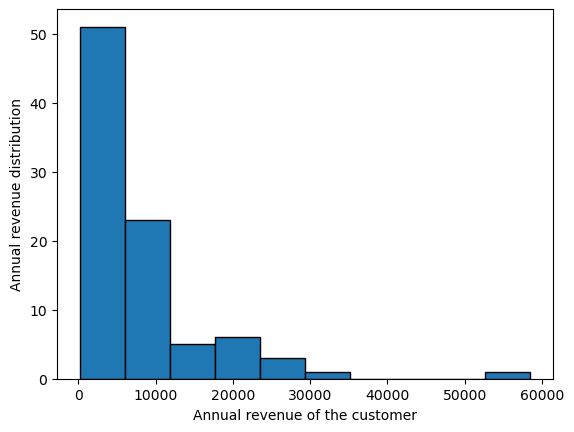

In [29]:
df5['Annual_Revenue'] = pd.to_numeric(df5.Annual_Revenue) # This is just done to make sure that every value in age is numeric.
plt.hist(x=df5.Annual_Revenue.values, edgecolor='black')
plt.xlabel("Annual revenue of the customer")
plt.ylabel("Annual revenue distribution")
plt.show()

Let us bracket annual revenue into 2 parts as most of the customers fall into a bracket of less than 10k annual revenue.

In [30]:
Revenue_list = []
for i in df5.Annual_Revenue:
    if i <= 10000:
        Revenue_list.append('<10000')
    elif i > 10000:
          Revenue_list.append('>10000')
df5['Annual_Revenue'] = Revenue_list
df5.Annual_Revenue = df5.Annual_Revenue.astype('category')

C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\1486529491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Annual_Revenue'] = Revenue_list
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\1486529491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.Annual_Revenue = df5.Annual_Revenue.astype('category')


In [31]:
df5['Annual_Revenue'].value_counts()

<10000    73
>10000    17
Name: Annual_Revenue, dtype: int64

#### ------------------------------------------Let us deal with categorical features separately---------------------------------------------------------------------------

### ACCOUNT NAME

In [32]:
Account_Name_dict = df5['Account_Name'].value_counts()
df5['Encoded_account_names'] = df5['Account_Name'].map(Account_Name_dict)

Account_name_list = []
for i in df5['Encoded_account_names']:
    if i == 1:
        Account_name_list.append('Strategic_account')
    else:
        Account_name_list.append('Major_account')
        
df5['Encoded_account_names'] = Account_name_list
df5.Encoded_account_names = df5.Encoded_account_names.astype('category')

df5 = df5.drop(['Account_Name','Account_Id'], axis = 1)
        
# Account_name_list = []
# if df5['Encoded_account_names'].value_counts().any() <= 1:
#     Account_name_list.append('Strategic_account')
# else:
#     Account_name_list.append('Major_account')
        
# df5['Encoded_account_names'] = Account_name_list
# df5.Encoded_account_names = df5.Encoded_account_names.astype('category')

C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\2962874686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Encoded_account_names'] = df5['Account_Name'].map(Account_Name_dict)
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\2962874686.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Encoded_account_names'] = Account_name_list
C:\Users\v-rohanraj\AppData\Local\Temp\ipykernel_15080\2962874686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [33]:
df5['Encoded_account_names'].value_counts()

Strategic_account    71
Major_account        19
Name: Encoded_account_names, dtype: int64

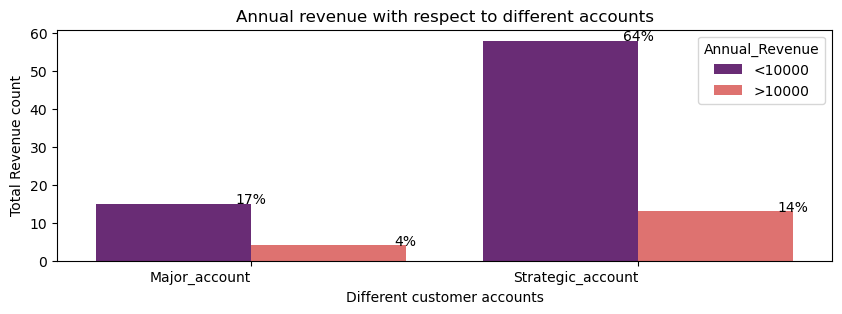

In [34]:
plt.figure(figsize =(10,3))
ax = sns.countplot(data = df5, x = 'Encoded_account_names',hue = 'Annual_Revenue',palette='magma')
plt.xticks(size =10)
plt.xlabel('Different customer accounts', size = 10)
plt.yticks(size = 10)
plt.ylabel('Total Revenue count', size = 10)
plt.title("Annual revenue with respect to different accounts", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df5)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

1. There are some specific accounts like A160 which are creating different annual revenues in a specific time period. 

2. Hence classified those accounts as major & others as strategic.

3. There are 64% in total strategic accounts whose annual revenue is less than 10k & 17% in total major accounts whose annual revenue is less than 10k.

### PRIMARY PRODUCER

In [35]:
df5['Primary_Producer'] = df5['Primary_Producer'].str.replace('Producer', '')
df5.Primary_Producer = df5.Primary_Producer.astype('category')

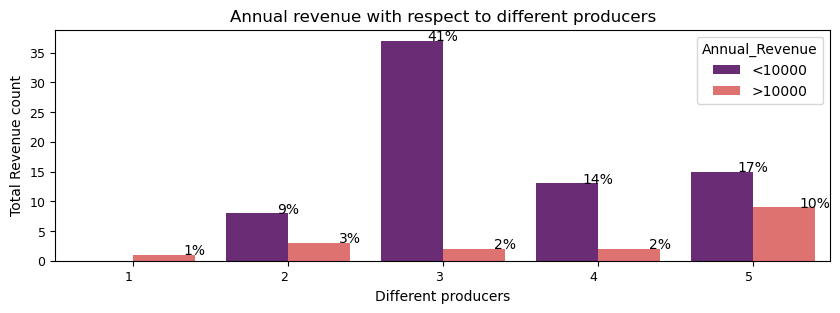

In [36]:
plt.figure(figsize =(10,3))
ax = sns.countplot(data = df5, x = 'Primary_Producer',hue = 'Annual_Revenue',palette='magma')
plt.xticks(size = 9)
plt.xlabel('Different producers', size = 10)
plt.yticks(size = 9)
plt.ylabel('Total Revenue count', size = 10)
plt.title("Annual revenue with respect to different producers", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df5)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

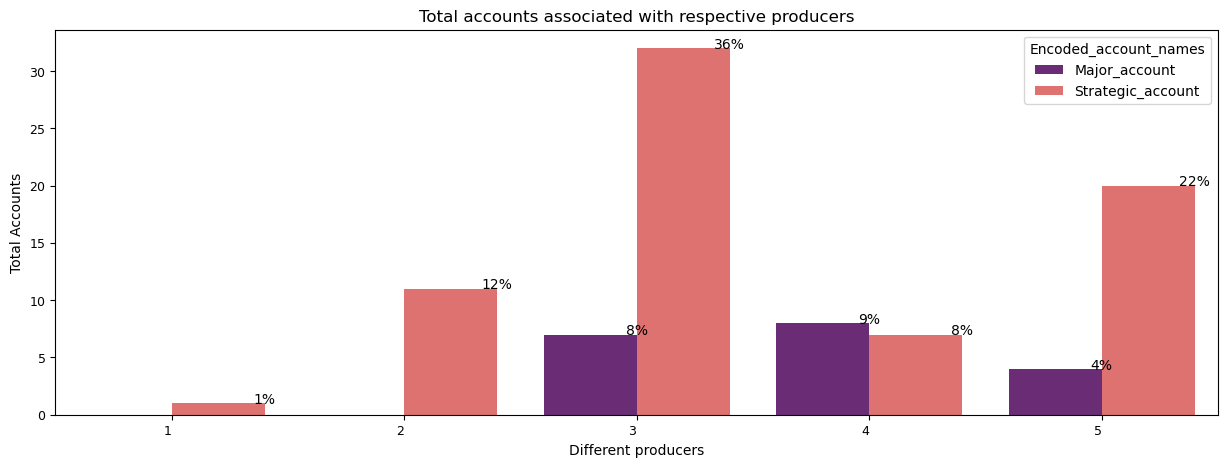

In [37]:
plt.figure(figsize =(15,5))
ax = sns.countplot(data = df5, x = 'Primary_Producer',hue = 'Encoded_account_names',palette='magma')
plt.xticks(size = 9)
plt.xlabel('Different producers', size = 10)
plt.yticks(size = 9)
plt.ylabel('Total Accounts', size = 10)
plt.title("Total accounts associated with respective producers", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df5)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

4. There are 43% accounts in total associated to producer 3, where 41% total revenue is less than 10000.

5. There are 27% accounts in total associated to producer 5, where 17% portion has total revenue less than 10000 & 10% portion has total revenue greater than 10000.

6. We have 36% strategic accounts specifically for producer 3 & 22%  strategic accounts specifically for producer 5.

7. In total 21% of the producers from producer - 4,3,5 are having major accounts ie there journey generates multiple revenues.

### PRIMARY OFFICE

In [38]:
df5['Primary_Office'] = df5['Primary_Office'].str.replace('Office', '')
df5.Primary_Office = df5.Primary_Office.astype('category')

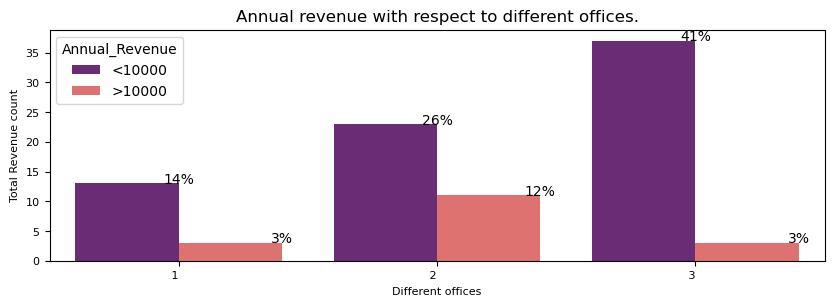

In [39]:
plt.figure(figsize =(10,3))
ax = sns.countplot(data = df5, x = 'Primary_Office',hue = 'Annual_Revenue',palette='magma')
plt.xticks(size = 8)
plt.xlabel('Different offices', size = 8)
plt.yticks(size = 8)
plt.ylabel('Total Revenue count', size = 8)
plt.title("Annual revenue with respect to different offices.", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df5)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

8. Office 3 has similar trends to producer 3. Clearly in office 3 41% of the total revenue generation is less than 10000.

9. Office 1 has similar trends to producer 4. Clearly in office 1 14% of the total revenue generation is less than 10000.

10. Office 2 has similar trends to combined, producer 5 & 2. Clearly in office 2 26% of the total revenue generation is less than 10000 & office 2 has 12% of the total revenue generation greater than 10000.

## STAGE NAME

<AxesSubplot:title={'center':'Opportunity stage count by account names'}, xlabel='Encoded_account_names'>

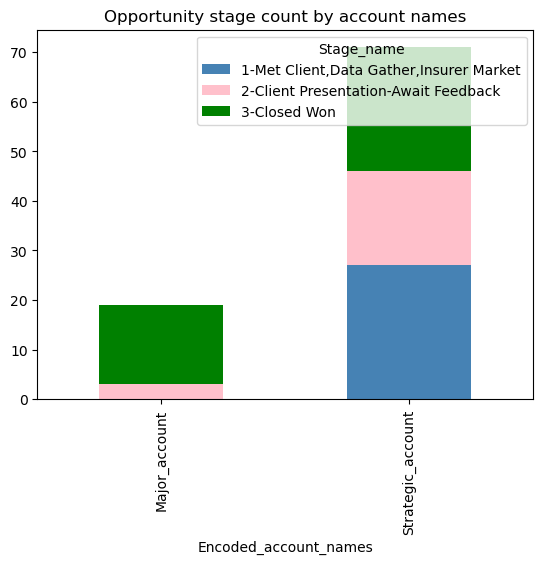

In [40]:
df5.groupby(['Encoded_account_names', 'Stage_name']).size().unstack().plot(kind='bar', stacked=True,
            color=['steelblue','pink','green'], title='Opportunity stage count by account names')

<AxesSubplot:title={'center':'Total Producer by annual revenue'}, xlabel='Primary_Producer'>

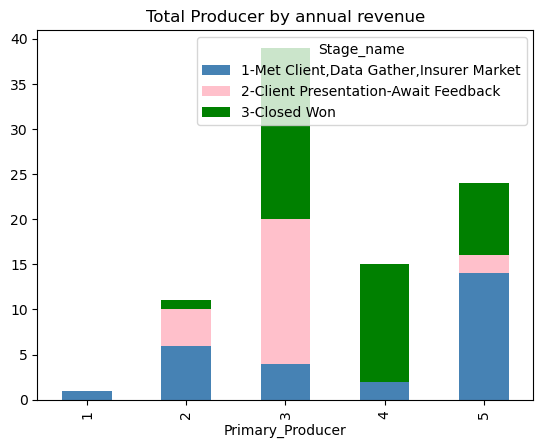

In [41]:
df5.groupby(['Primary_Producer', 'Stage_name']).size().unstack().plot(kind='bar', stacked=True,
            color=['steelblue','pink','green'], title='Total Producer by annual revenue')

11. Most of the major accounts are closed or either in a client presentation mode.


12. Producer 4 has most opportunities closed/Won.

In [42]:
df5.head()

,Date,Primary_Producer,Stage_name,Opportunity_Name,Niche_Affiliations,Expected_Decision_Date,Annual_Revenue,Primary_Office,Office_derived,Total_journey_days,Encoded_account_names
1,2017-03-07,2,"1-Met Client,Data Gather,Insurer Market",Commercial Insurance - June 2019,Transportation,2019-06-01,>10000,2,Office 2,720-900,Strategic_account
2,2019-02-01,5,3-Closed Won,commercial covers,Commercial - All Other,2019-02-28,<10000,2,Office 2,0-180,Major_account
3,2019-02-01,5,3-Closed Won,commercial covers,Commercial - All Other,2019-02-28,>10000,2,Office 2,0-180,Major_account
5,2019-02-01,5,3-Closed Won,commercial covers,Commercial - All Other,2019-02-28,>10000,2,Office 2,0-180,Major_account
10,2019-01-02,5,3-Closed Won,property owners,Unclassified/Commercial,2019-07-01,<10000,2,Office 2,0-180,Strategic_account


### NICHE CONSULTINGS

In [43]:
df5['Niche_Affiliations'].value_counts()

Commercial - All Other                 32
Manufacturing                          16
Real Estate                            11
Transportation                          7
Construction                            6
Food & Agribusiness                     5
Healthcare - All Other                  2
Real Estate Commercial                  1
Law Firms                               1
Financial Institutions; Real Estate     1
Healthcare - Institutional              1
Chartered Surveyors                     1
Public Sector                           1
Other                                   1
Retail                                  1
Financial Institutions                  1
Unclassified/Commercial                 1
Finance                                 1
Name: Niche_Affiliations, dtype: int64

In [44]:
Niche_Affiliations_list = []
for i in df5.Niche_Affiliations:
    if i == 'Commercial - All Other' or i == 'Manufacturing' or i == 'Real Estate' or i == 'Transportation' or i == 'Construction':
        Niche_Affiliations_list.append('MAJOR_NICHE_CONSULTINGS')
    else:
        Niche_Affiliations_list.append('MINOR_NICHE_CONSULTINGS')

In [45]:
df5["Niche_Affiliations"]=Niche_Affiliations_list
df5.Niche_Affiliations = df5.Niche_Affiliations.astype('category')

In [46]:
df5

,Date,Primary_Producer,Stage_name,Opportunity_Name,Niche_Affiliations,Expected_Decision_Date,Annual_Revenue,Primary_Office,Office_derived,Total_journey_days,Encoded_account_names
1,2017-03-07,2,"1-Met Client,Data Gather,Insurer Market",Commercial Insurance - June 2019,MAJOR_NICHE_CONSULTINGS,2019-06-01,>10000,2,Office 2,720-900,Strategic_account
2,2019-02-01,5,3-Closed Won,commercial covers,MAJOR_NICHE_CONSULTINGS,2019-02-28,<10000,2,Office 2,0-180,Major_account
3,2019-02-01,5,3-Closed Won,commercial covers,MAJOR_NICHE_CONSULTINGS,2019-02-28,>10000,2,Office 2,0-180,Major_account
5,2019-02-01,5,3-Closed Won,commercial covers,MAJOR_NICHE_CONSULTINGS,2019-02-28,>10000,2,Office 2,0-180,Major_account
10,2019-01-02,5,3-Closed Won,property owners,MINOR_NICHE_CONSULTINGS,2019-07-01,<10000,2,Office 2,0-180,Strategic_account
...,...,...,...,...,...,...,...,...,...,...,...
170,2019-03-27,5,2-Client Presentation-Await Feedback,First Meeting 09/04/19,MAJOR_NICHE_CONSULTINGS,2019-08-05,<10000,2,Office 2,0-180,Strategic_account
172,2018-06-28,1,"1-Met Client,Data Gather,Insurer Market",Meeting 06/03/2019,MAJOR_NICHE_CONSULTINGS,2019-07-01,>10000,1,Office 1,360-540,Strategic_account
174,2019-04-29,2,2-Client Presentation-Await Feedback,Insurance Review,MAJOR_NICHE_CONSULTINGS,2019-06-28,>10000,2,Office 2,0-180,Strategic_account
176,2019-04-29,3,3-Closed Won,IASME Audit,MAJOR_NICHE_CONSULTINGS,2019-04-29,<10000,3,Office 3,<0,Major_account


In [48]:
df5 = df5.dropna(axis = 0, how ='any')

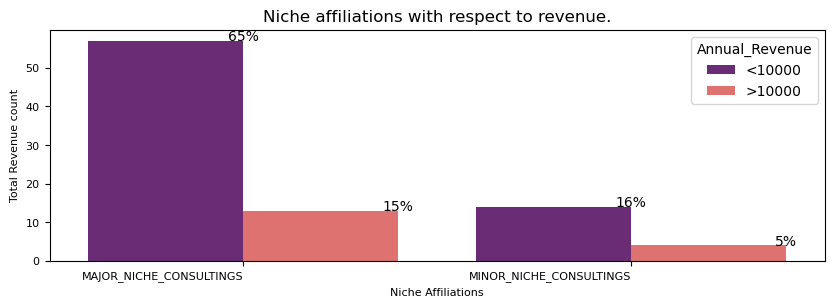

In [52]:
plt.figure(figsize =(10,3))
ax = sns.countplot(data = df5, x = 'Niche_Affiliations',hue = 'Annual_Revenue',palette='magma')
plt.xticks(size = 8)
plt.xlabel('Niche Affiliations', size = 8)
plt.yticks(size = 8)
plt.ylabel('Total Revenue count', size = 8)
plt.title("Niche affiliations with respect to revenue.", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right");

total = len(df5)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

13. 65% of the total, major niche consultings generate an annual revenue < 10k. 

### TOTAL JOURNEY IN DAYS

<AxesSubplot:title={'center':'Journey size of different accounts'}, xlabel='Encoded_account_names'>

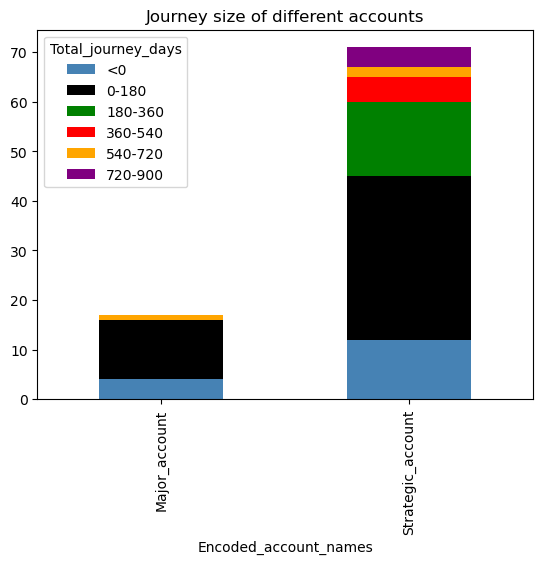

In [55]:
df5.groupby(['Encoded_account_names', 'Total_journey_days']).size().unstack().plot(kind='bar', stacked=True,
            color=['steelblue','black','green','red','orange','purple'], title='Journey size of different accounts')

14. Most of the major accounts cover a span of 180 days.

15. There are some accounts which take maximum an year to get closed and giving a winning status.

16. We can also see from the data that some accounts are getting closed on the same day. It may be considered as an anamoly in the data.

<AxesSubplot:title={'center':'Journey size of the accounts at different stages'}, xlabel='Stage_name'>

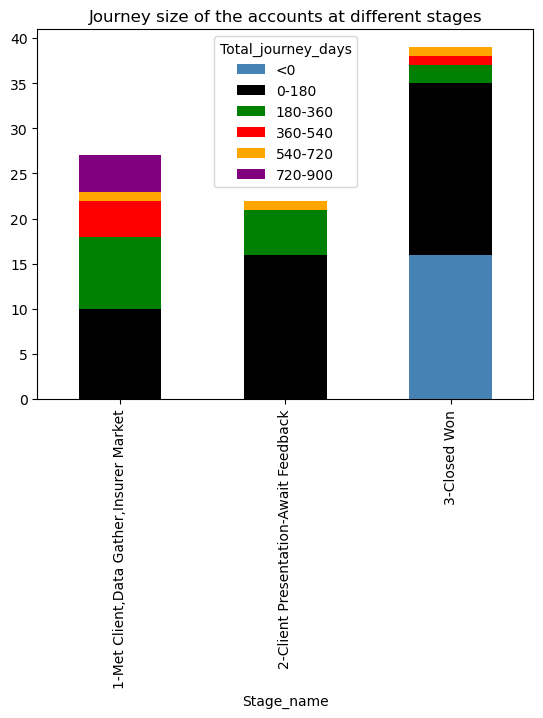

In [62]:
df5.groupby(['Stage_name', 'Total_journey_days']).size().unstack().plot(kind='bar', stacked=True,
            color=['steelblue','black','green','red','orange','purple'], title='Journey size of the accounts at different stages')

17. There are some accounts which take close to an year or more even in the first stage.

18. Accounts in the second & third stage mostly take 6 months to get closed.

### ---------------------------------THE END---------------------------------------------------------------------